<a href="https://colab.research.google.com/github/Jackline-Jebet/Msc-Financial-Engineering_Quant-Finance-Projects/blob/main/Financial-Data/Financial_data_M2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yfin
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import date

pd.options.display.float_format = "{:,.6f}".format

In [ ]:
# 1. Pull Equities Data for Amazon and Ford, along with Bitcoin Data
# Starting and end dates
start = datetime.date(2019, 8, 1)
end = datetime.date(2024, 8, 1)

# Get Amazon, Ford, and  Bitcoin data
df = yfin.download(["AMZN", "F", "BTC-USD"], start, end, auto_adjust = False)["Adj Close"]

# Convert DataFrame index to timezone-aware (UTC)
df.index = df.index.tz_localize('UTC')

[*********************100%***********************]  3 of 3 completed


In [ ]:
# View the first 10 rows of the data
# Will notice missing(NaN) values on weekends; Stocks only trade on Mon-Fridays, while bitcoin trade everyday
df.head(10)


Ticker,AMZN,BTC-USD,F
Date,,,
2019-08-01 00:00:00+00:00,92.765999,"10,399.668945",7.005560
2019-08-02 00:00:00+00:00,91.162003,"10,518.174805",6.982988
2019-08-03 00:00:00+00:00,NaN,"10,821.726562",NaN
2019-08-04 00:00:00+00:00,NaN,"10,970.184570",NaN
2019-08-05 00:00:00+00:00,88.256500,"11,805.653320",6.945363
2019-08-06 00:00:00+00:00,89.391502,"11,478.168945",7.133481
2019-08-07 00:00:00+00:00,89.669998,"11,941.968750",7.171106
2019-08-08 00:00:00+00:00,91.644501,"11,966.407227",7.193680
2019-08-09 00:00:00+00:00,90.378998,"11,862.936523",7.110908


In [ ]:
# Show summary stats for the data ie meand, std, count(Digging deeper)
df.describe()

Ticker,AMZN,BTC-USD,F
count,"1,258.000000","1,827.000000","1,258.000000"
mean,137.853120,"30,854.084965",9.682666
std,31.730629,"18,350.840533",2.946053
min,81.820000,"4,970.788086",3.119112
25%,107.565500,"13,602.354004",7.029468
50%,143.729996,"28,033.562500",10.222282
75%,164.599251,"43,593.824219",11.337598
max,200.000000,"73,083.500000",19.692286


In [ ]:
# Get the last 5 rows of data
df.tail(5)

Ticker,AMZN,BTC-USD,F
Date,,,
2024-07-27 00:00:00+00:00,NaN,"67,813.335938",NaN
2024-07-28 00:00:00+00:00,NaN,"68,255.867188",NaN
2024-07-29 00:00:00+00:00,183.199997,"66,819.914062",10.208381
2024-07-30 00:00:00+00:00,181.710007,"66,201.015625",10.050758
2024-07-31 00:00:00+00:00,186.979996,"64,619.250000",10.032215


In [ ]:
# Get the first 5 rows and last 5 rows of the dataset
df

Ticker,AMZN,BTC-USD,F
Date,,,
2019-08-01 00:00:00+00:00,92.765999,"10,399.668945",7.005560
2019-08-02 00:00:00+00:00,91.162003,"10,518.174805",6.982988
2019-08-03 00:00:00+00:00,NaN,"10,821.726562",NaN
2019-08-04 00:00:00+00:00,NaN,"10,970.184570",NaN
2019-08-05 00:00:00+00:00,88.256500,"11,805.653320",6.945363
...,...,...,...
2024-07-27 00:00:00+00:00,NaN,"67,813.335938",NaN
2024-07-28 00:00:00+00:00,NaN,"68,255.867188",NaN
2024-07-29 00:00:00+00:00,183.199997,"66,819.914062",10.208381


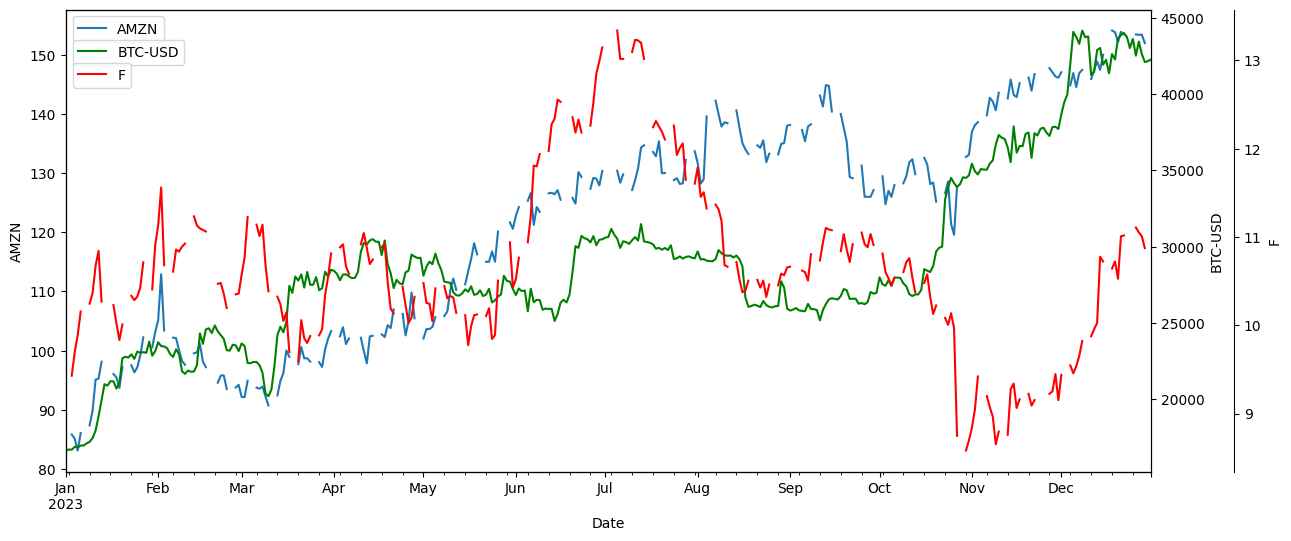

In [ ]:
# Create a figure
# Plot where the 3 assets have the same index (x-axis) butdifferent scale (y-axis)
fig = plt.figure(figsize=(14,6))
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Plot the data
df["2023-01-01":"2023-12-31"].plot(ax=ax1, y='AMZN', legend=True)
df["2023-01-01":"2023-12-31"].plot(ax=ax2, y='BTC-USD', legend=True, color='g')
df["2023-01-01":"2023-12-31"].plot(ax=ax3, y='F', legend=True, color='r')

# Set labels to the axes
ax1.set_ylabel('AMZN')
ax2.set_ylabel('BTC-USD')
ax3.set_ylabel('F')
ax3.spines['right'].set_position(('outward', 60))

# set position of legends
ax1.legend(['AMZN'], loc='upper left')
ax2.legend(['BTC-USD'], loc='upper left', bbox_to_anchor=(0, 0.95))
ax3.legend(['F'], loc='upper left', bbox_to_anchor=(0, 0.9))

plt.show()

In [ ]:
# 2.Calculating Return on Investment
#  Access the first row
first_row = df.iloc[0]

# Assign price values to variables
amzn_price = first_row["AMZN"]
btc_price = first_row["BTC-USD"]
ford_price = first_row["F"]


# Print price values
print("Purchase price of AMZN:", np.round(amzn_price, 3))
print("Purchase price of BTC-USD:", np.round(btc_price, 3))
print("Purchase price of F:", np.round(ford_price, 3))

Purchase price of AMZN: 92.766
Purchase price of BTC-USD: 10399.669
Purchase price of F: 7.006


In [ ]:
# Divide $1,000 by each of price values to get number of shares
amzn_shares = 1000 / amzn_price
f_shares = 1000 / ford_price
btc_shares  = 1000 / btc_price

# Print number of shares for each ticker
print("Number of shares of AMZN:", np.round(amzn_shares, 3))
print("Number of shares of F:", np.round(f_shares, 3))
print("Number of shares of BTC-USD:", np.round(btc_shares, 3))

Number of shares of AMZN: 10.78
Number of shares of F: 142.744
Number of shares of BTC-USD: 0.096


In [ ]:
# Get last date values from df
last_row = df.iloc[-1]

# Assign price values to variables
amzn_price_end = last_row["AMZN"]
btc_price_end = last_row["BTC-USD"]
ford_price_end= last_row["F"]

# Print end date prices
print("End date price of AMZN:", np.round(amzn_price_end, 3))
print("End date price of BTC-USD:", np.round(btc_price_end, 3))
print("End date price of F:", np.round(ford_price_end, 3))
print("----------------------------")

# Compute end date values
amzn_value = amzn_shares * amzn_price_end
btc_value = btc_shares * btc_price_end
ford_value = f_shares * ford_price_end

# print end values
print("Holding value of AMZN:", np.round(amzn_value, 3))
print("Holding value of BTC-USD:", np.round(btc_value, 3))
print("Holding value of F:", np.round(ford_value, 3))


End date price of AMZN: 186.98
End date price of BTC-USD: 64619.25
End date price of F: 10.032
----------------------------
Holding value of AMZN: 2015.609
Holding value of BTC-USD: 6213.587
Holding value of F: 1432.036


In [ ]:
# Compute simple returns
amzn_simple_return = (amzn_value - 1000) / 1000
btc_simple_return = (btc_value - 1000) / 1000
ford_simple_return = (ford_value - 1000) / 1000

# print the returns
print("Simple return of AMZN:", np.round(amzn_simple_return * 100, 3), "%")
print("Simple return of BTC-USD:", np.round(btc_simple_return * 100, 3), "%")
print("Simple return of F:", np.round(ford_simple_return * 100, 3), "%")

Simple return of AMZN: 101.561 %
Simple return of BTC-USD: 521.359 %
Simple return of F: 43.204 %


In [ ]:
# Comparing Equities and Bitcoin to Bonds
# Pull data from BLV data and join it with our current DataFrame, df
df = df.join(yfin.download(["BLV"], start, end, auto_adjust = False)["Adj Close"].tz_localize('UTC'))
df

[*********************100%***********************]  1 of 1 completed


Ticker,AMZN,BTC-USD,F,BLV
Date,,,,
2019-08-01 00:00:00+00:00,92.765999,"10,399.668945",7.005560,76.420143
2019-08-02 00:00:00+00:00,91.162003,"10,518.174805",6.982988,76.955170
2019-08-03 00:00:00+00:00,NaN,"10,821.726562",NaN,NaN
2019-08-04 00:00:00+00:00,NaN,"10,970.184570",NaN,NaN
2019-08-05 00:00:00+00:00,88.256500,"11,805.653320",6.945363,77.614273
...,...,...,...,...
2024-07-27 00:00:00+00:00,NaN,"67,813.335938",NaN,NaN
2024-07-28 00:00:00+00:00,NaN,"68,255.867188",NaN,NaN
2024-07-29 00:00:00+00:00,183.199997,"66,819.914062",10.208381,68.696373


In [ ]:
# Calculate Log Returns, Remove Unused Columns, and Drop Nulls
# Drop Na rows
returns_stocks_BLV = df[['AMZN', 'F', 'BLV']].dropna().pct_change()

# Crypto is traded 24/7
returns_BTC = df[['BTC-USD']].pct_change()

# We broadcast the index of crypto on the stocks in order to join the datasets having NaN for weekends within stocks and BLV columns
returns_stocks = returns_stocks_BLV.reindex(returns_BTC.index)
returns = returns_BTC.join(returns_stocks_BLV, how = 'outer')[1:]
returns

Ticker,BTC-USD,AMZN,F,BLV
Date,,,,
2019-08-02 00:00:00+00:00,0.011395,-0.017291,-0.003222,0.007001
2019-08-03 00:00:00+00:00,0.028860,NaN,NaN,NaN
2019-08-04 00:00:00+00:00,0.013719,NaN,NaN,NaN
2019-08-05 00:00:00+00:00,0.076158,-0.031872,-0.005388,0.008565
2019-08-06 00:00:00+00:00,-0.027740,0.012860,0.027085,0.006694
...,...,...,...,...
2024-07-27 00:00:00+00:00,-0.001454,NaN,NaN,NaN
2024-07-28 00:00:00+00:00,0.006526,NaN,NaN,NaN
2024-07-29 00:00:00+00:00,-0.021038,0.003836,-0.016086,0.003785


In [ ]:
# Show Summary Stats for the Returns
returns.describe()

Ticker,BTC-USD,AMZN,F,BLV
count,"1,826.000000","1,257.000000","1,257.000000","1,257.000000"
mean,0.001579,0.000803,0.000671,-0.000034
std,0.033707,0.022175,0.027760,0.009179
min,-0.371695,-0.140494,-0.183614,-0.075170
25%,-0.013480,-0.011068,-0.013605,-0.005253
50%,0.000234,0.000643,0.000000,0.000572
75%,0.015996,0.012222,0.014212,0.005206
max,0.187465,0.135359,0.234414,0.049139


In [ ]:
# Converting Daily Returns to Annual
(returns.describe()[["BTC-USD", "F"]])

Ticker,BTC-USD,F
count,"1,826.000000","1,257.000000"
mean,0.001579,0.000671
std,0.033707,0.027760
min,-0.371695,-0.183614
25%,-0.013480,-0.013605
50%,0.000234,0.000000
75%,0.015996,0.014212
max,0.187465,0.234414


In [ ]:
#Annualize BTC-USD with 365 trading days
(np.prod(returns_BTC + 1, axis=0) ** (1/len(returns_BTC))) ** (365) - 1

,0
Ticker,
BTC-USD,0.440439


In [ ]:
#Annualize stocks with 252 trading days
(np.prod(returns_stocks_BLV + 1, axis=0) ** (1/len(returns_stocks_BLV))) ** (252) - 1

,0
Ticker,
AMZN,0.150742
F,0.074584
BLV,-0.018936


In [ ]:
# Get innitial and end prices from df
blv_price = df.iloc[0]["BLV"]
blv_price_end = df.iloc[-1]["BLV"]

# Compute simple return rate
blv_return_rate = (blv_price_end - blv_price) / blv_price
print("Simple return rate of BLV:", np.round(blv_return_rate * 100, 3), "%")

# Compute total simple return
total_simple_return = 1000 * (1 + blv_return_rate)
print("Total simple return of BLV: $", np.round(total_simple_return, 3))

Simple return rate of BLV: -9.103 %
Total simple return of BLV: $ 908.974


In [ ]:
start = datetime.date.today()-datetime.timedelta(365*10)
end = datetime.date.today()
start = datetime.date(2019, 8, 1)
end = datetime.date(2024, 8, 1)

# Get data
prices = yfin.download(["^GSPC", "^RUT"], start, end, auto_adjust = False)["Adj Close"]

# Rename column to make names more intuitive
prices = prices.rename(columns={"^GSPC": "SP500", "^RUT": "Russell2000"})

# Get dataset stats
prices.describe()

[*********************100%***********************]  2 of 2 completed


Ticker,SP500,Russell2000
count,"1,258.000000","1,258.000000"
mean,"4,028.833253","1,865.957234"
std,685.682781,284.232353
min,"2,237.399902",991.159973
25%,"3,502.235046","1,674.337524"
50%,"4,110.745117","1,873.654968"
75%,"4,468.547485","2,067.780090"
max,"5,667.200195","2,442.739990"


In [ ]:
prices.head()

Ticker,SP500,Russell2000
Date,,
2019-08-01,"2,953.560059","1,550.760010"
2019-08-02,"2,932.050049","1,533.660034"
2019-08-05,"2,844.739990","1,487.410034"
2019-08-06,"2,881.770020","1,502.089966"
2019-08-07,"2,883.979980","1,500.689941"


In [ ]:
# 4.2 Calculate Log Returns, Remove Unused Columns, and Drop Nulls
# Calculate log returns
df = np.log(prices) - np.log(prices.shift(1))
df = df.iloc[1:, 0:]
df.head()

Ticker,SP500,Russell2000
Date,,
2019-08-02,-0.007309,-0.011088
2019-08-05,-0.030230,-0.030621
2019-08-06,0.012933,0.009821
2019-08-07,0.000767,-0.000932
2019-08-08,0.018588,0.020734


In [ ]:
# Calculating Future Value of Each Index
# Calculate average annual return over the past 5 years
avg_returns = df.mean() * 252

# Calculate future value for each index
future_value_sp500 = 1000 * np.exp(avg_returns["SP500"] * 5)
future_value_russell2000 = 1000 * np.exp(avg_returns["Russell2000"] * 5)

print("Future Value of SP500:", future_value_sp500)
print("Future Value of Russell2000:", future_value_russell2000)


Future Value of SP500: 1872.5041981875975
Future Value of Russell2000: 1455.0892174400194


In [ ]:
# Calculate average daily return over the past 5 years
avg_daily_returns = df.mean()

# Calculate future value for each index (using daily returns and 5 years)
num_days = 252 * 5  # Number of trading days in 5 years
future_value_sp500 = 1000 * np.exp(avg_daily_returns["SP500"] * num_days)
future_value_russell2000 = 1000 * np.exp(avg_daily_returns["Russell2000"] * num_days)

print("Future Value of SP500:", future_value_sp500)
print("Future Value of Russell2000:", future_value_russell2000)


Future Value of SP500: 1872.5041981875975
Future Value of Russell2000: 1455.0892174400194


In [ ]:
# 5. Investment Opportunities: Volatility
# 5.1 Price Volatility: High-Low
prices.max()

,0
Ticker,
SP500,"5,667.200195"
Russell2000,"2,442.739990"


In [ ]:
prices.min()

,0
Ticker,
SP500,"2,237.399902"
Russell2000,991.159973


In [ ]:
prices.max() - prices.min()

,0
Ticker,
SP500,"3,429.800293"
Russell2000,"1,451.580017"


In [ ]:
# Slice last year from prices data
end = pd.Timestamp(end).tz_localize(None)  # Remove timezone info

currYear = prices.loc[
    pd.Timestamp(end - datetime.timedelta(365)) : end
]

# Calculate the difference between the maximum and minimum values in the currYear
currYear.max() - currYear.min()

,0
Ticker,
SP500,"1,549.830078"
Russell2000,626.729980


In [ ]:
(currYear.max() - currYear.min()) / prices.iloc[-1]

,0
Ticker,
SP500,0.280649
Russell2000,0.277993


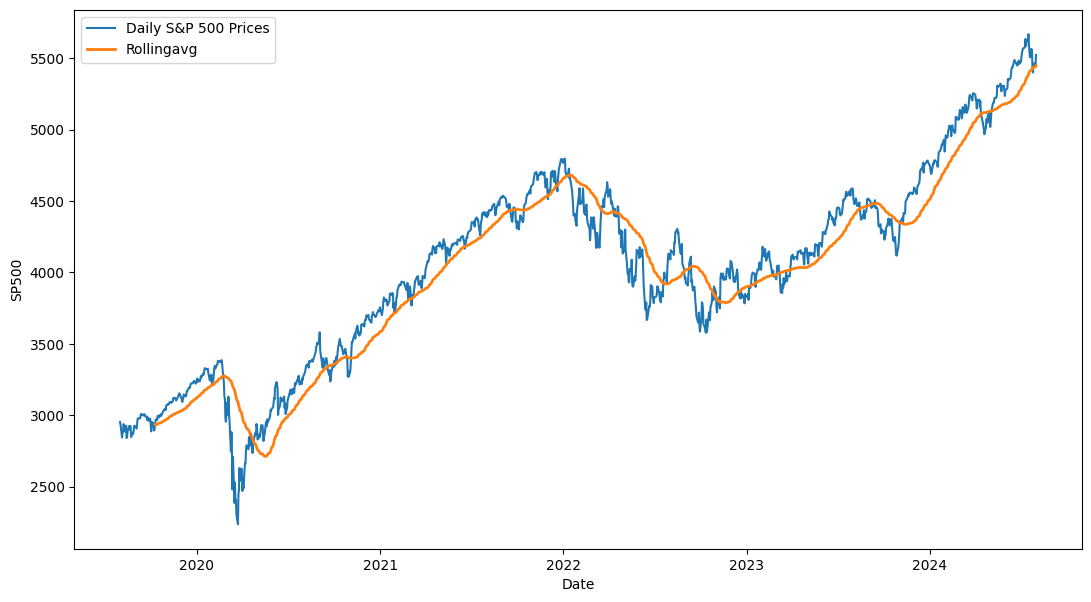

In [ ]:
# Calculate the 50-day rolling average of the "SP500" column
prices["SP500 50 day_rolling_avg"] = prices.SP500.rolling(50).mean()

# set figure size and plot a simple time series plot using seaborn.lineplot()
plt.figure(figsize=(13, 7))
sns.lineplot(x="Date", y="SP500", data=prices, label="Daily S&P 500 Prices")

# plot rolling average
sns.lineplot(x="Date", y="SP500 50 day_rolling_avg", data=prices, label="Rollingavg", linewidth=2)
plt.show()

In [ ]:
((abs(prices - prices.rolling(50).mean())) / prices).mean()

,0
Ticker,
SP500,0.037068
Russell2000,0.048725
SP500 50 day_rolling_avg,0.028209


In [ ]:
# 5.4 Price Volatility: Standard Deviations
prices.std()

,0
Ticker,
SP500,685.682781
Russell2000,284.232353
SP500 50 day_rolling_avg,635.644388


In [ ]:
df.std()

,0
Ticker,
SP500,0.013458
Russell2000,0.017503


In [ ]:
def investCompare(startTime, endTime, tickers):
    # pull price data from yahoo -- (list(tickers.keys())) = ['^GSPC','^RUT']
    startTime = pd.Timestamp(startTime).tz_localize('UTC')
    endTime = pd.Timestamp(endTime).tz_localize('UTC')
    prices = yfin.download(list(tickers.keys()), startTime, endTime, auto_adjust = False)["Adj Close"]
    prices = prices.rename(columns=tickers)
    returns = np.log(prices) - np.log(prices.shift(1))
    returns = returns.iloc[1:, 0:]

    # pull data into separate DataFrame to just look at the last 365 days of
    # data for calculating our high/low metric
    currYear = prices.loc[(endTime - datetime.timedelta(365)).tz_convert(prices.index.tz) : endTime.tz_convert(prices.index.tz)]

    # High-Low
    highLow = (currYear.max() - currYear.min()) / prices.iloc[-1]
    highLow = pd.DataFrame(highLow, columns=["HighMinusLow"])

    # Moving average volatility
    MA = pd.DataFrame(
        ((abs(prices - prices.rolling(50).mean())) / prices).mean(),
        columns=["MovingAverageVolatility"],
    )
    investments = pd.merge(highLow, MA, left_index=True, right_index=True)

    # Standard deviation
    investments = pd.merge(
        investments,
        pd.DataFrame(returns.std(), columns=["StandardDeviation"]),
        left_index=True,
        right_index=True,
    )

    # Daily return
    investments = pd.merge(
        investments,
        pd.DataFrame(returns.mean(), columns=["Daily Return Percentage"]),
        left_index=True,
        right_index=True,
    )

    # Format columns:
    # Hogh-Low column rounded to 5 decimal
    investments["HighMinusLow"] = investments["HighMinusLow"].round(4).astype(str)

    # MA, std and returns columns as percentage
    columns = ["MovingAverageVolatility", "StandardDeviation", "Daily Return Percentage"]
    for col in columns:
      investments[col] = (investments[col] * 100).round(3).astype(str) + '%'

    return investments

In [ ]:
investCompare(
    datetime.date(2019, 8, 1),
    datetime.date(2024, 8, 1),
    {"^GSPC": "SP500", "^RUT": "Russell2000"},
)

[*********************100%***********************]  2 of 2 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
SP500,0.2806,3.707%,1.346%,0.05%
Russell2000,0.278,4.873%,1.75%,0.03%


In [ ]:
# Set start and end dates
start = datetime.date(2022, 8, 1)
end = datetime.date(2024, 8, 1)

# Compute investments stats using investCompare() function
investCompare(start, end, {"VUG": "Growth", "VTV": "Value"})

[*********************100%***********************]  2 of 2 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
Value,0.2306,2.546%,0.825%,0.05%
Growth,0.3582,4.083%,1.284%,0.078%


In [ ]:
# Set start and end dates
start = datetime.date(2010, 8, 1)
end = datetime.date(2024, 8, 1)

# Compute investments stats using investCompare() function
investCompare(start, end, {"VUG": "Growth", "VTV": "Value"})

[*********************100%***********************]  2 of 2 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
Value,0.2306,2.753%,1.043%,0.045%
Growth,0.3582,3.435%,1.224%,0.059%


In [ ]:
# Comparing Domestic vs. Foreign Stocks
start = datetime.date(2022, 8, 1)
end = datetime.date(2024, 8, 1)
investCompare(start, end,{"^GSPC": "SP500", "SPEU": "Europe ETF", "GXC": "China ETF"})

[*********************100%***********************]  3 of 3 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
China ETF,0.2629,4.816%,1.633%,-0.025%
Europe ETF,0.2324,3.378%,1.051%,0.055%
SP500,0.2806,2.985%,0.98%,0.058%


In [ ]:
# Comparing Domestic vs. Foreign Stocks
start = datetime.date(2010, 8, 1)
end = datetime.date(2024, 8, 1)
investCompare(start, end,{"^GSPC": "SP500", "SPEU": "Europe ETF", "GXC": "China ETF"})

[*********************100%***********************]  3 of 3 completed


,HighMinusLow,MovingAverageVolatility,StandardDeviation,Daily Return Percentage
Ticker,,,,
China ETF,0.2629,4.521%,1.567%,0.006%
Europe ETF,0.2324,3.241%,1.233%,0.021%
SP500,0.2806,2.884%,1.085%,0.045%
